## 小区分と細目のマッピング(1)

2018採択課題のある小区分の研究代表者は、2014-2017に採択された課題では、どの細目だったのか（ある細目で採択された研究者は、2018ではどの小区分で採択されているか）

背景として、多くの研究者は、応募する研究分野を変えないだろうという前提で。ある細目「所属」の研究者は、どの小区分に移行したのか、人ベースでみる感じ。

### 事前準備

In [1]:
import pandas as pd
import numpy as np
import pickle
import configparser
from sqlalchemy import create_engine
from sqlalchemy.types import String, Integer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

config = configparser.ConfigParser()
config.read('../settings/config.ini')
username = config['mariadb']['username']
password = config['mariadb']['password']
database = config['mariadb']['database']
url = 'mysql+pymysql://' + username + ':' + password + '@localhost:3306/' + database + '?charset=utf8'
engine = create_engine(url)

### 材料1: 2014-2017に新規採択された課題リスト

後述の理由により、基盤B又はCの一般、若手Bのみ取得する

In [2]:
sql = '''
SELECT
grantaward_field.awardnumber,
grantaward.category_niicode,
kaken_master_category.category_name,
grantaward.section_niicode,
kaken_master_section.section_name,
grantaward_field.field_niicode,
kaken_master_field.field_name,
grantaward.kenkyuusha_id
FROM grantaward_field
LEFT OUTER JOIN grantaward USING (awardnumber)
LEFT OUTER JOIN kaken_master_category USING (category_niicode)
LEFT OUTER JOIN kaken_master_section USING (section_niicode)
LEFT OUTER JOIN kaken_master_field ON kaken_master_field.field_niicode = grantaward_field.field_niicode
WHERE grantaward.startfiscalyear >= 2014
AND grantaward.startfiscalyear <= 2017
AND kaken_master_field.field_table_start_date = '2014-04-01'
AND kaken_master_field.layer = 4
'''
f14 = pd.read_sql_query(sql, engine)
f14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105865 entries, 0 to 105864
Data columns (total 8 columns):
awardnumber         105865 non-null object
category_niicode    105865 non-null int64
category_name       105865 non-null object
section_niicode     105865 non-null int64
section_name        61106 non-null object
field_niicode       105865 non-null int64
field_name          105865 non-null object
kenkyuusha_id       105865 non-null int64
dtypes: int64(4), object(4)
memory usage: 6.5+ MB


In [3]:
f14 = f14.fillna(0)
f14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105865 entries, 0 to 105864
Data columns (total 8 columns):
awardnumber         105865 non-null object
category_niicode    105865 non-null int64
category_name       105865 non-null object
section_niicode     105865 non-null int64
section_name        105865 non-null object
field_niicode       105865 non-null int64
field_name          105865 non-null object
kenkyuusha_id       105865 non-null int64
dtypes: int64(4), object(4)
memory usage: 6.5+ MB


種目名: niicode
- 基盤B: 69
- 基盤C: 72
- 若手B: 65

区分名: niicode
- 一般: 17

In [4]:
f14 = f14.query('(category_niicode == [69, 72] & section_niicode == 17) | category_niicode == 65')
f14

,awardnumber,category_niicode,category_name,section_niicode,section_name,field_niicode,field_name,kenkyuusha_id
2369,26463583,72,基盤研究(C),17,一般,1283,地域看護学,40465787
2370,26463582,72,基盤研究(C),17,一般,1283,地域看護学,60321303
2371,26463581,72,基盤研究(C),17,一般,1283,地域看護学,30290365
2372,26463580,72,基盤研究(C),17,一般,1283,地域看護学,60197910
2373,26463579,72,基盤研究(C),17,一般,1283,地域看護学,70346419
2374,26463578,72,基盤研究(C),17,一般,1283,地域看護学,80184521
2375,26463577,72,基盤研究(C),17,一般,1283,地域看護学,90516147
2376,26463576,72,基盤研究(C),17,一般,1283,地域看護学,40637526
2377,26463575,72,基盤研究(C),17,一般,1283,地域看護学,439514
2378,26463574,72,基盤研究(C),17,一般,1283,地域看護学,90310408


In [5]:
f14.category_name.value_counts()

基盤研究(C)    45275
若手研究(B)    26746
基盤研究(B)    10001
Name: category_name, dtype: int64

In [6]:
pd.crosstab(f14['section_name'], f14['category_name'], margins=True)

category_name,基盤研究(B),基盤研究(C),若手研究(B),All
section_name,,,,
0,0,0,26746,26746
一般,10001,45275,0,55276
All,10001,45275,26746,82022


### 材料2: 2018に新規採択された課題リスト

小区分で審査されるのは、基盤B,Cの応募区分一般及び若手研究なので、該当の種目、区分のみ抽出する

In [7]:
sql = '''
SELECT
grantaward_review_section.awardnumber,
grantaward.category_niicode,
kaken_master_category.category_name,
grantaward.section_niicode,
kaken_master_section.section_name,
grantaward_review_section.review_section_niicode,
kaken_master_review_section.review_section_name,
grantaward.kenkyuusha_id
FROM grantaward_review_section
LEFT OUTER JOIN grantaward USING (awardnumber)
LEFT OUTER JOIN kaken_master_category USING (category_niicode)
LEFT OUTER JOIN kaken_master_section USING (section_niicode)
LEFT OUTER JOIN kaken_master_review_section USING (review_section_niicode)
WHERE grantaward.startfiscalyear = 2018
'''
rs18 = pd.read_sql_query(sql, engine)
rs18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23813 entries, 0 to 23812
Data columns (total 8 columns):
awardnumber               23813 non-null object
category_niicode          23813 non-null int64
category_name             23813 non-null object
section_niicode           23813 non-null int64
section_name              16676 non-null object
review_section_niicode    23813 non-null int64
review_section_name       23813 non-null object
kenkyuusha_id             23813 non-null int64
dtypes: int64(4), object(4)
memory usage: 1.5+ MB


In [8]:
rs18 = rs18.fillna(0)
rs18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23813 entries, 0 to 23812
Data columns (total 8 columns):
awardnumber               23813 non-null object
category_niicode          23813 non-null int64
category_name             23813 non-null object
section_niicode           23813 non-null int64
section_name              23813 non-null object
review_section_niicode    23813 non-null int64
review_section_name       23813 non-null object
kenkyuusha_id             23813 non-null int64
dtypes: int64(4), object(4)
memory usage: 1.5+ MB


種目名: niicode
- 基盤B: 69
- 基盤C: 72
- 若手: 252

区分名: niicode
- 一般: 17

In [9]:
rs18 = rs18.query('(category_niicode == [69, 72] & section_niicode == 17) | category_niicode == 252')
rs18

,awardnumber,category_niicode,category_name,section_niicode,section_name,review_section_niicode,review_section_name,kenkyuusha_id
0,18K18324,252,若手研究,0,0,11,小区分90010:デザイン学関連,80631572
1,18K18323,252,若手研究,0,0,11,小区分90010:デザイン学関連,60564119
2,18K18322,252,若手研究,0,0,11,小区分90010:デザイン学関連,634859
3,18K18321,252,若手研究,0,0,11,小区分90010:デザイン学関連,30581219
4,18K18320,252,若手研究,0,0,11,小区分90010:デザイン学関連,90757931
5,18K18319,252,若手研究,0,0,11,小区分90010:デザイン学関連,10816135
6,18K18318,252,若手研究,0,0,11,小区分90010:デザイン学関連,70580091
7,18K18317,252,若手研究,0,0,11,小区分90010:デザイン学関連,30326417
8,18K18316,252,若手研究,0,0,11,小区分90010:デザイン学関連,20766331
9,18K18315,252,若手研究,0,0,11,小区分90010:デザイン学関連,70796458


In [10]:
rs18.category_name.value_counts()

基盤研究(C)    12918
若手研究        6556
基盤研究(B)     3139
Name: category_name, dtype: int64

In [11]:
pd.crosstab(rs18['section_name'], rs18['category_name'], margins=True)

category_name,基盤研究(B),基盤研究(C),若手研究,All
section_name,,,,
0,0,0,6556,6556
一般,3139,12918,0,16057
All,3139,12918,6556,22613


### 2018採択課題の研究者番号で、2014-2017の採択課題をフィルタする

In [12]:
rs18id = rs18.kenkyuusha_id.tolist()
f14 = f14[f14['kenkyuusha_id'].isin(rs18id)]
f14

,awardnumber,category_niicode,category_name,section_niicode,section_name,field_niicode,field_name,kenkyuusha_id
2369,26463583,72,基盤研究(C),17,一般,1283,地域看護学,40465787
2372,26463580,72,基盤研究(C),17,一般,1283,地域看護学,60197910
2374,26463578,72,基盤研究(C),17,一般,1283,地域看護学,80184521
2379,26463573,72,基盤研究(C),17,一般,1283,地域看護学,70381465
2384,26463568,72,基盤研究(C),17,一般,1283,地域看護学,90320556
2390,26463562,72,基盤研究(C),17,一般,1283,地域看護学,90352632
2393,26463559,72,基盤研究(C),17,一般,1283,地域看護学,339061
2404,26463548,72,基盤研究(C),17,一般,1283,地域看護学,50466447
2418,26463534,72,基盤研究(C),17,一般,1283,地域看護学,336611
2419,26463533,72,基盤研究(C),17,一般,1283,地域看護学,70282209


In [13]:
saimokulist = f14.field_niicode.sort_values().unique()
len(saimokulist)

321

In [14]:
df = pd.DataFrame()
for saimoku in saimokulist:
    li = f14[f14['field_niicode'] == saimoku].kenkyuusha_id.tolist()
    grouped = rs18[rs18['kenkyuusha_id'].isin(li)].groupby('review_section_niicode').size()
    df = pd.concat([df, pd.DataFrame(grouped, columns=[saimoku])], axis=1)
df

,941,942,943,945,946,947,948,949,950,952,...,1276,1277,1278,1279,1280,1281,1282,1283,1285,1286
review_section_niicode,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 306 rows（縦軸／小区分） × 321 columns（横軸／細目）のヒートマップを描く

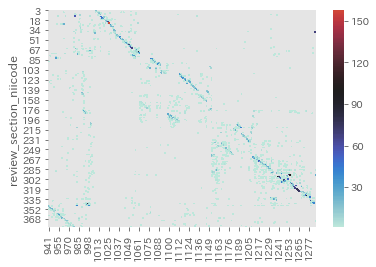

In [15]:
sns.heatmap(df, center=100)

ぱっと見は、だいたい予想通り。小区分と細目は、対応があるように見える。

### 占有率でみると

In [16]:
oc = df.fillna(0)
oc = oc.apply(lambda x: round(x / sum(x), 2), axis=0)
oc = oc.replace(0, np.NaN)
oc

,941,942,943,945,946,947,948,949,950,952,...,1276,1277,1278,1279,1280,1281,1282,1283,1285,1286
review_section_niicode,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


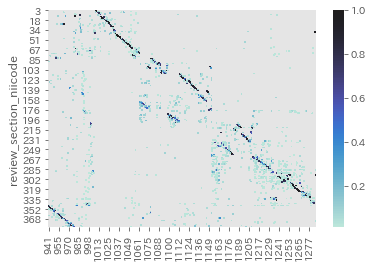

In [17]:
sns.heatmap(oc, center=1)

### 占有率90%以上の、細目と小区分の関係になっている組合せを抽出する

90%でなくていもいいけど、「この細目の人は、概ねあの小区分に移行したよ」と言えそうなものは、いくつくらいあるか

In [28]:
melt = oc.reset_index()
melt = melt.melt(id_vars=['review_section_niicode'], var_name='field_niicode')
melt = melt.dropna()
melt = melt.astype({'field_niicode': int})
melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 72 to 98217
Data columns (total 3 columns):
review_section_niicode    1901 non-null int64
field_niicode             1901 non-null int32
value                     1901 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 52.0 KB


In [29]:
sql = '''
SELECT
field_niicode,
field_name
FROM kaken_master_field
WHERE kaken_master_field.field_table_start_date = '2014-04-01'
AND field_table_type = 'saimoku'
'''
master_field = pd.read_sql_query(sql, engine)
master_field.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
field_niicode    418 non-null int64
field_name       418 non-null object
dtypes: int64(1), object(1)
memory usage: 6.6+ KB


In [30]:
sql = '''
SELECT
review_section_niicode,
review_section_name
FROM kaken_master_review_section
WHERE review_section_table_type = 'review_section'
AND review_section_table_start_date = '2018-04-01'
'''
master_review_section = pd.read_sql_query(sql, engine)
master_review_section.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
review_section_niicode    400 non-null int64
review_section_name       400 non-null object
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


In [31]:
melt = pd.merge(melt, master_field)
melt = pd.merge(melt, master_review_section)
melt = melt.drop_duplicates()
melt.sort_values('value', ascending=False)

,review_section_niicode,field_niicode,value,field_name,review_section_name
1401,44,1037,1.00,刑事法学,小区分05050:刑事法学関連
1409,57,1048,1.00,経済史,小区分07070:経済史関連
835,138,1133,1.00,建築環境・設備,小区分23020:建築環境および建築設備関連
1400,43,1036,1.00,社会法学,小区分05040:社会法学関連
1945,256,1180,1.00,自然人類学,小区分45050:自然人類学関連
346,380,975,1.00,自然共生システム,小区分64040:自然共生システム関連
1996,322,1267,1.00,形成外科学,小区分56070:形成外科学関連
1396,42,1035,1.00,国際法学,小区分05030:国際法学関連
1389,40,1033,1.00,基礎法学,小区分05010:基礎法学関連
428,230,1202,1.00,農業環境・情報工学,小区分41040:農業環境工学および農業情報工学関連


In [40]:
melt.query('field_niicode == 1150')

,review_section_niicode,field_niicode,value,field_name,review_section_name
1561,154,1150,0.08,核融合学,小区分26050:材料加工および組織制御関連
1577,96,1150,0.85,核融合学,小区分14020:核融合学関連
1585,175,1150,0.08,核融合学,小区分31010:原子力工学関連


2014-2017年度に細目1150核融合学の課題を持っていて、2018年度に小区分の種目に採択された研究者のうち、85%が2018年度は小区分14020核融合学関連に移行して、8%ずつで材料加工および組織制御と、原子力工学に移行したことが分かる。

そのうちデータを精査して、ウェブアプリケーションにして一般公開したい…。